In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

## 1. load data

In [32]:
# change this to the path of csv file 
csv_file = '../catalan_data_course/catalan-juvenile-recidivism-subset.csv'
df = pd.read_csv(csv_file, header=0)

A overview of the dataset we have

In [33]:
df.head()

,id,V1_sex,V4_area_origin,V6_province,V8_age,V9_age_at_program_end,V11_criminal_record,V12_n_criminal_record,V13_n_crime_cat,V15_main_crime_cat,...,V28_days_from_crime_to_program,V29_program_duration,V115_RECID2015_recid,V10_date_of_birth_year,V10_date_of_birth_month,V22_main_crime_date_year,V22_main_crime_date_month,V30_program_start_year,V30_program_start_month,V31_program_end_month
0,691,male,Spain,Lleida,15,17,1,1-2,3+,Against People,...,587.0,132,1,1992,11,2008,8,2010,4,8
1,956,female,Spain,Barcelona,14,15,1,1-2,2,Against People,...,107.0,258,1,1995,7,2009,8,2009,12,8
2,2560,male,Maghreb,Barcelona,15,16,1,3-5,3+,Against People,...,135.0,85,1,1994,1,2009,11,2010,3,6
3,2018,male,Maghreb,Girona,14,15,1,5+,2,Against People,...,176.0,271,1,1994,4,2009,1,2009,6,3
4,1650,male,Spain,Tarragona,17,20,1,5+,3+,Against People,...,261.0,533,1,1990,9,2008,9,2009,5,11


In [34]:
df.shape

(4652, 29)

The dataset is quite good in terms of miss data.

In [35]:
df.isnull().sum()

id                                0
V1_sex                            0
V4_area_origin                    0
V6_province                       0
V8_age                            0
V9_age_at_program_end             0
V11_criminal_record               0
V12_n_criminal_record             0
V13_n_crime_cat                   0
V15_main_crime_cat                0
V16_violent_crime                 0
V17_crime_classification          0
V19_committed_crime               0
V20_n_juvenile_records            0
V21_n_crime                       0
V23_territory_of_execution        0
V24_finished_program              0
V26_finished_measure_grouped      0
V27_program_duration_cat          0
V28_days_from_crime_to_program    0
V29_program_duration              0
V115_RECID2015_recid              0
V10_date_of_birth_year            0
V10_date_of_birth_month           0
V22_main_crime_date_year          0
V22_main_crime_date_month         0
V30_program_start_year            0
V30_program_start_month     

## 2. convert categorical data into numeric data
Notice that, in this dataset, we have many categorical attributes, which could not be dealt by random forest classifier (sklearn) as well as neural networks.

We use `pd.get_dummies` to convert those columns into numeric ones.

Before that, we drop `id` which is not useful for classification.

In [36]:
# drop id
columus_to_drop = ['id']
df = df.drop(columus_to_drop,axis=1)

Then we detect all the categorical columns from our dataset.

In [37]:
# detect the categorical data
num_cols = df._get_numeric_data().columns
# print(num_cols)
cols = df.columns
cat_cols = list(set(cols) - set(num_cols))
print('categorial columns: {}\ncount: {}'.format(cat_cols,len(cat_cols)))

categorial columns: ['V23_territory_of_execution', 'V27_program_duration_cat', 'V26_finished_measure_grouped', 'V6_province', 'V19_committed_crime', 'V4_area_origin', 'V1_sex', 'V24_finished_program', 'V15_main_crime_cat', 'V12_n_criminal_record', 'V13_n_crime_cat']
count: 11


In [38]:
# check the types in each categorical data
# could be commented, not related to what we did next
for each_col in cat_cols:
    print('---{}---'.format(each_col))
    print(df[each_col].value_counts())

---V23_territory_of_execution---
Barcelona    3258
Girona        604
Tarragona     430
Lleida        360
Name: V23_territory_of_execution, dtype: int64
---V27_program_duration_cat---
<6 months            3656
6 months < 1 year     628
>1 year               368
Name: V27_program_duration_cat, dtype: int64
---V26_finished_measure_grouped---
ATM                  1669
MRM                  1467
Probation             787
Community Service     278
Other                 257
Internment            194
Name: V26_finished_measure_grouped, dtype: int64
---V6_province---
Barcelona    3257
Girona        594
Tarragona     449
Lleida        352
Name: V6_province, dtype: int64
---V19_committed_crime---
Lesions                                        1011
Robatori i robatori amb força en les coses      530
Furt                                            527
Danys                                           401
Contra la llibertat                             354
Robatori amb violència                        

Next, we use `get_dummies` function from `pandas` to convert the categorical data into one-hot encodings.

In [39]:
df = pd.get_dummies(df,columns=cat_cols)
df.head()

,V8_age,V9_age_at_program_end,V11_criminal_record,V16_violent_crime,V17_crime_classification,V20_n_juvenile_records,V21_n_crime,V28_days_from_crime_to_program,V29_program_duration,V115_RECID2015_recid,...,V15_main_crime_cat_Against People,V15_main_crime_cat_Against Property,V15_main_crime_cat_Other,V12_n_criminal_record_0,V12_n_criminal_record_1-2,V12_n_criminal_record_3-5,V12_n_criminal_record_5+,V13_n_crime_cat_1,V13_n_crime_cat_2,V13_n_crime_cat_3+
0,15,17,1,1,1,1.0,4,587.0,132,1,...,1,0,0,0,1,0,0,0,0,1
1,14,15,1,1,1,1.0,2,107.0,258,1,...,1,0,0,0,1,0,0,0,1,0
2,15,16,1,1,1,4.0,3,135.0,85,1,...,1,0,0,0,0,1,0,0,0,1
3,14,15,1,1,1,7.0,2,176.0,271,1,...,1,0,0,0,0,0,1,0,1,0
4,17,20,1,1,1,6.0,3,261.0,533,1,...,1,0,0,0,0,0,1,0,0,1


For Xgboost classifer, it does not allow symbols like '>' and '<' in column names.

In [40]:
# somehow not allowed for xgboost
col_names = df.columns
for each in col_names:
    if '>' in each or '<' in each:
        print(each)

V27_program_duration_cat_6 months < 1 year
V27_program_duration_cat_<6 months
V27_program_duration_cat_>1 year


In [41]:
df['V27_program_duration_cat_between6monthto1year'] =df['V27_program_duration_cat_6 months < 1 year']
df['V27_program_duration_cat_lessthan6month'] =df['V27_program_duration_cat_<6 months']
df['V27_program_duration_cat_morethan1year'] =df['V27_program_duration_cat_>1 year']
df = df.drop(['V27_program_duration_cat_6 months < 1 year','V27_program_duration_cat_<6 months','V27_program_duration_cat_>1 year'],axis=1)

Notice that, `get_dummies` function returns the full collection of one-hot encodings. However, we only need `k-1` our of `k` as the last one could be presented as:

$y_k = 1$, if $y_i = 0$ for all $i \in [1,k-1]$

$y_k = 0$, otherwise

where $k$ represents the class index in one column.

Therefore, we remove the less represented class in each categorical attributes.

In [44]:
# correlated with other columns
columns_to_drop = ['V6_province_Lleida',
                   'V19_committed_crime_Violència familiar',
                  'V23_territory_of_execution_Tarragona',
                  'V12_n_criminal_record_5+',
                  'V15_main_crime_cat_Other',
                  'V24_finished_program_Tractament terapèutic ambulatori',
                  'V4_area_origin_Other',
                  'V13_n_crime_cat_3+',
                  'V1_sex_female',
                   'V26_finished_measure_grouped_Probation',
                  'V27_program_duration_cat_morethan1year']

In [46]:
sensitive_attributes = ['V1_sex_male',
                        'V4_area_origin_Europe','V4_area_origin_Latin America',
                        'V4_area_origin_Maghreb','V4_area_origin_Spain']

In [47]:
df = df.drop(columns_to_drop,axis=1)

Save to new file if you like.

In [48]:
# save new file
df.to_csv('../catalan_data_course/catalan-juvenile-recidivism-subset-numeric.csv')  

## 3. Baseline models (non-DL)

### 3.1 Random forest from sklearn
#### Data preparation
<span style="color:red"> NOTICE: A stable and bias-considered split function is needed here.</span>  
The one being used is a simple one, not suggested.

In [109]:
# X - features, drop traget and sensitive attribuets
X = df.drop(['V115_RECID2015_recid']+sensitive_attributes, axis=1)

# y - recidivism 
y = df['V115_RECID2015_recid']

# A - sensitive attribute(s)
A_attributes = sensitive_attributes

# y with A, in case we need to subgroup the samples
y_with_A = df[['V115_RECID2015_recid']+A_attributes]

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_with_A, y_test_with_A = train_test_split(X, y_with_A, test_size = 0.3, random_state = 42)

In [111]:
y_train = y_train_with_A.drop(A_attributes,axis=1)
y_test = y_test_with_A.drop(A_attributes,axis=1)

#### Random forest model from sklearn

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2023,n_estimators=100,criterion='gini',
                            min_samples_split=25,
                            max_depth=8)
rfc.fit(X_train, y_train)

# just {0,1} prediction
y_pred = rfc.predict(X_test)

# prediction probabilities
y_pred_prob=rfc.predict_proba(X_test)


from sklearn.metrics import accuracy_score
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

C:\Users\12632\AppData\Local\Temp\ipykernel_6716\1511450123.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Model accuracy score : 0.7206


`y_pred_prob` looks like this: the first column refers to probability of predicting as '0', which is NO re-offend. The second column refers to probability of predicting as '1', which means re-offend.

In [113]:
y_pred_prob

array([[0.87948837, 0.12051163],
       [0.84014302, 0.15985698],
       [0.63160468, 0.36839532],
       ...,
       [0.87857507, 0.12142493],
       [0.72978644, 0.27021356],
       [0.47564826, 0.52435174]])

If you'd like to see a roc curve for all test samples:

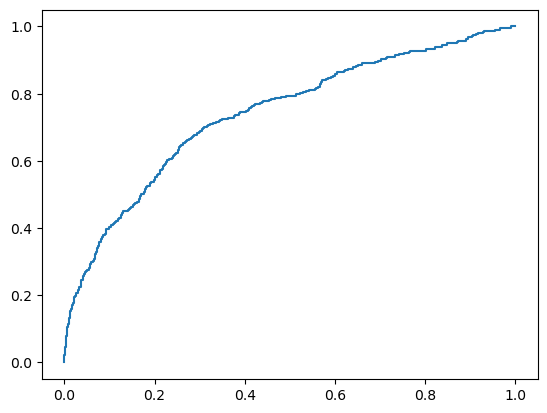

In [114]:
import sklearn
fpr,tpr,threshold=sklearn.metrics.roc_curve(y_test,y_pred_prob[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

from sklearn.metrics import roc_auc_score


And the confusion matrix:

In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[822,  74],
       [316, 184]], dtype=int64)

## 4. fairness assessment

(Feel free to add any thing here! - nina)

### faireness metrics

There's mainly three types of fairness evaluations according to [this book](https://fairmlbook.org/).

* Independence: $P(\hat{Y}|A=0) = P(\hat{Y}|A=1)$
* Seperation: $P(\hat{Y}|A=0,Y=1) = P(\hat{Y}|A=1,Y=1)$
* Sufficiency: $P(Y|R=r,A=0) = P(Y|R=r,A=1)$

The following are mainly based on [this paper](https://arxiv.org/abs/2209.13177).

In practice, **independence**, or Demographic Parity (DP), could be measured by positive predictive rate(PPR), where *PPR equals Positive prediction over total population*.

**Seperation**, also named as Equal of Odds, could be measured by True Positive Rate (TPR) and False Positive Rate (FPR).

**Sufficiency**, .... (Calibration)

### Overall unfairness measurement

After computing the faireness of each sensitive group, there's a need to qualify the overall degree of unfairness(fairness).
Oftenly, people will use the subtraction, division, standard deviation and normalized range.

Take substraction as an example:

$$O_{subtraction} = max(\{M_g\})-min(\{M_g\}) $$

where $M_g$ represents the fairness metric of subgroup $g$.


### Fairness-accuracy trade-off score

We do not want to scrifice too much on accuracy when achieving fairness. 

Some methods that used before:
1) Curve-based method  
Originated from [this paper](). The horiconral axis represents one kind of fairness measurement for a model, and the vertical axis shows the ovrall performance on the whole dataset.
The closer curve is to the top left corner, the smaller trade-off it has.


2) Value-based method  
...

Notice that the faireness-accuracy trade-off score is on model selection level.

### 4.1 fairness assessment on *gender* and *area of origin*

In [116]:
y_test_with_A.columns

Index(['V115_RECID2015_recid', 'V1_sex_male', 'V4_area_origin_Europe',
       'V4_area_origin_Latin America', 'V4_area_origin_Maghreb',
       'V4_area_origin_Spain'],
      dtype='object')

Combine the relevant information into one dataframe:

In [126]:
y_pred_prob = y_pred_prob[:,1]

In [130]:
prediction_prob_with_A = pd.DataFrame(pd.np.column_stack([y_test_with_A, y_pred_prob]))
prediction_prob_with_A.columns =['target_recid', 'gender', 
                                 'origin_Europe', 'origin_Latin_America','origin_Maghreb','origin_Spain',
                                'pred_recid']

C:\Users\12632\AppData\Local\Temp\ipykernel_6716\4251056041.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  prediction_prob_with_A = pd.DataFrame(pd.np.column_stack([y_test_with_A, y_pred_prob]))


In [131]:
prediction_prob_with_A.head(5)

,target_recid,gender,origin_Europe,origin_Latin_America,origin_Maghreb,origin_Spain,pred_recid
0,0.0,1.0,0.0,0.0,0.0,1.0,0.120512
1,0.0,1.0,0.0,0.0,0.0,1.0,0.159857
2,1.0,1.0,0.0,1.0,0.0,0.0,0.368395
3,1.0,1.0,0.0,0.0,0.0,1.0,0.248765
4,0.0,0.0,0.0,0.0,0.0,1.0,0.284703


Convert from onhot encoding back to categorial data:

In [132]:
conditions = [
    (prediction_prob_with_A['origin_Europe'] == 1),
    (prediction_prob_with_A['origin_Latin_America'] == 1),
    (prediction_prob_with_A['origin_Maghreb'] == 1),
    (prediction_prob_with_A['origin_Spain'] == 1),
    (prediction_prob_with_A['origin_Europe'] == 0) & (prediction_prob_with_A['origin_Latin_America'] == 0) & 
        (prediction_prob_with_A['origin_Maghreb'] == 0) & (prediction_prob_with_A['origin_Spain'] == 0)
]

results=['Europe','Latin_America','Maghreb','Spain','Other']

prediction_prob_with_A['area_origin'] = np.select(conditions, results)

drop the rest columns

In [133]:
prediction_prob_with_A = prediction_prob_with_A.drop(['origin_Europe','origin_Latin_America','origin_Maghreb','origin_Spain'],axis=1)

In [134]:
prediction_prob_with_A.head(5)

,target_recid,gender,pred_recid,area_origin
0,0.0,1.0,0.120512,Spain
1,0.0,1.0,0.159857,Spain
2,1.0,1.0,0.368395,Latin_America
3,1.0,1.0,0.248765,Spain
4,0.0,0.0,0.284703,Spain


#### Some statistics

In [140]:
prediction_prob_with_A.groupby('gender').mean()[['target_recid','pred_recid']]

,target_recid,pred_recid
gender,,
0.0,0.179592,0.301155
1.0,0.396177,0.348937


[]

<Figure size 640x480 with 0 Axes>

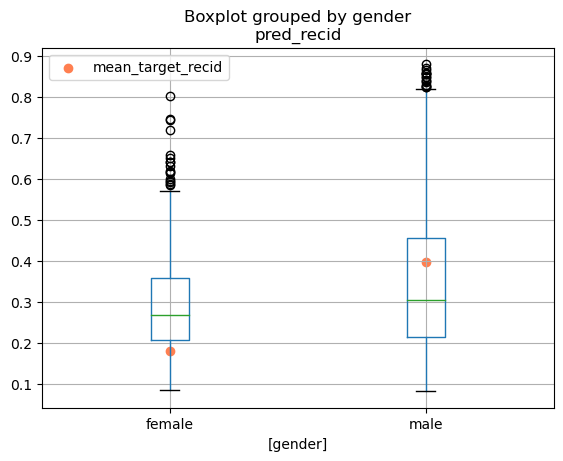

In [175]:

res = prediction_prob_with_A.groupby('gender').mean()[['target_recid','pred_recid']]
plt.figure()
prediction_prob_with_A[['gender','pred_recid']].boxplot(by='gender')
plt.scatter(1,res['target_recid'][0.0],color='coral')
plt.scatter(2,res['target_recid'][1.0],color='coral',label='mean_target_recid')
plt.legend()
plt.xticks([1,2], ['female','male'])
plt.plot()

In [136]:
prediction_prob_with_A.groupby('area_origin').mean()[['target_recid','pred_recid']]

,target_recid,pred_recid
area_origin,,
Europe,0.361446,0.369835
Latin_America,0.401914,0.335341
Maghreb,0.502591,0.413645
Other,0.322581,0.341209
Spain,0.317045,0.322972


In [177]:
res['target_recid']

area_origin
Europe           0.361446
Latin_America    0.401914
Maghreb          0.502591
Other            0.322581
Spain            0.317045
Name: target_recid, dtype: float64

[]

<Figure size 640x480 with 0 Axes>

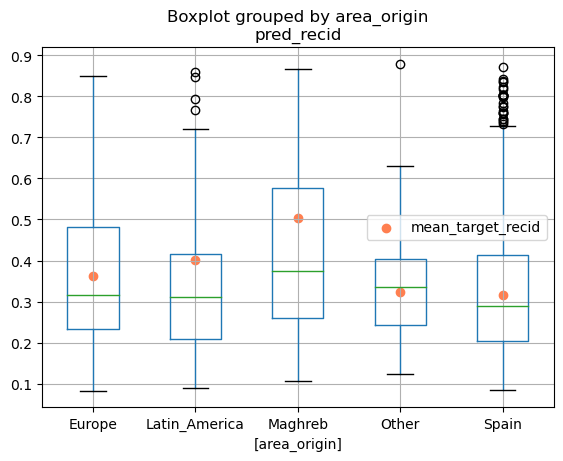

In [181]:
res = prediction_prob_with_A.groupby('area_origin').mean()[['target_recid','pred_recid']]
plt.figure()
prediction_prob_with_A[['area_origin','pred_recid']].boxplot(by='area_origin')
plt.scatter(1,res['target_recid']['Europe'],color='coral')
plt.scatter(2,res['target_recid']['Latin_America'],color='coral',label='mean_target_recid')
plt.scatter(3,res['target_recid']['Maghreb'],color='coral')
plt.scatter(4,res['target_recid']['Other'],color='coral')
plt.scatter(5,res['target_recid']['Spain'],color='coral')
plt.legend()
# plt.xticks([1,2], ['female','male'])
plt.plot()

This already could be used to measure independence

In [146]:
# male_X_test = X_test[X_test['V1_sex_female']==0]
# male_y_test_with_A = y_test_with_A[y_test_with_A['V1_sex_female']==0]

# female_X_test = X_test[X_test['V1_sex_female']==1]
# female_y_test_with_A = y_test_with_A[y_test_with_A['V1_sex_female']==1]
# print(len(female_X_test))
# print(len(male_X_test))

# Europe_X_test = X_test[X_test['V4_area_origin_Europe']==1]
# Latin_America_X_test = X_test[X_test['V4_area_origin_Latin America']==1]
# Maghreb_X_test = X_test[X_test['V4_area_origin_Maghreb']==1]
# print(len(Europe_X_test))
# print(len(Latin_America_X_test))
# print(len(Maghreb_X_test))

Seperation - ROC & TP & FP

In [191]:
fpr,tpr,threshold=sklearn.metrics.roc_curve(prediction_prob_with_A['target_recid'],
                                                           prediction_prob_with_A['pred_recid'])

In [187]:
male_prediction_prob_with_A = prediction_prob_with_A[prediction_prob_with_A['gender']==1]

fpr_male,tpr_male,threshold_male=sklearn.metrics.roc_curve(male_prediction_prob_with_A['target_recid'],
                                                           male_prediction_prob_with_A['pred_recid'])

female_prediction_prob_with_A =prediction_prob_with_A[prediction_prob_with_A['gender']==0]
fpr_female,tpr_female,threshold_female=sklearn.metrics.roc_curve(female_prediction_prob_with_A['target_recid'],
                                                           female_prediction_prob_with_A['pred_recid'])

In [215]:
print('AUROC for male:{:.4f}'.format(roc_auc_score(male_prediction_prob_with_A['target_recid'],
                                                   male_prediction_prob_with_A['pred_recid'])))
print('AUROC for female:{:.4f}'.format(roc_auc_score(female_prediction_prob_with_A['target_recid'],
                                                   female_prediction_prob_with_A['pred_recid'])))

AUROC for male:0.7354
AUROC for female:0.7609


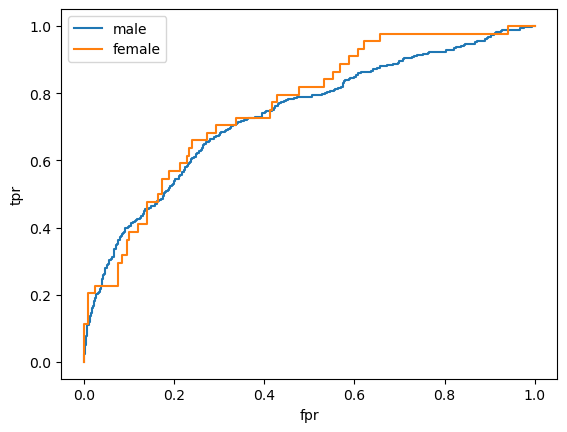

In [216]:
plt.figure()
plt.plot(fpr_male,tpr_male,label='male')
plt.plot(fpr_female,tpr_female,label='female')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

In [224]:
origins_list=['Europe','Latin_America','Spain','Maghreb','Other']
roc_info={}
for each_origin in origins_list:
    seg_prediction_prob_with_A = prediction_prob_with_A[prediction_prob_with_A['area_origin']==each_origin]
    fpr_seg,tpr_seg,threshold_seg=sklearn.metrics.roc_curve(seg_prediction_prob_with_A['target_recid'],
                                                            seg_prediction_prob_with_A['pred_recid'])
    tmp = {}
    tmp['fpr'] = fpr_seg
    tmp['tpr'] = tpr_seg
    
    roc_info[each_origin]=tmp
    

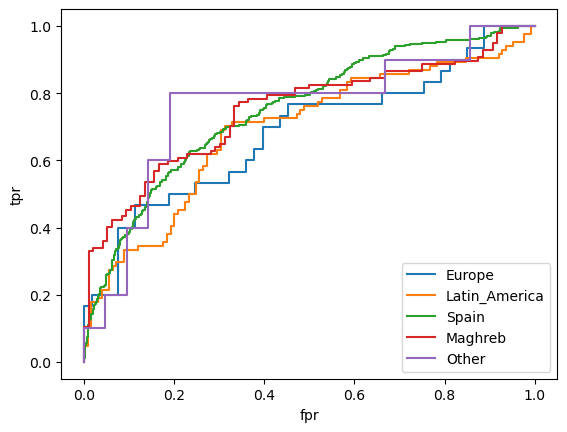

In [225]:
plt.figure()
for each_origin in origins_list:
    plt.plot(roc_info[each_origin]['fpr'],roc_info[each_origin]['tpr'],label=each_origin)

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

In [211]:
# def Find_Optimal_Cutoff(target, predicted):
#     fpr, tpr, threshold = sklearn.metrics.roc_curve(target, predicted)
#     i = np.arange(len(tpr)) 
#     roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
#     roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

#     return list(roc_t['threshold']) 

# threshold = Find_Optimal_Cutoff(prediction_prob_with_A['target_recid'],prediction_prob_with_A['pred_recid'])
# print(threshold[0])
# pred_recid_round = [1 if x > threshold[0] else 0 for x in prediction_prob_with_A['pred_recid']]
# print('Model accuracy score : {0:0.4f}'.format(accuracy_score(prediction_prob_with_A['target_recid'],
#                                                               pred_recid_round)))

In [212]:
# print('Model accuracy score : {0:0.4f}'.format(accuracy_score(male_y_test_with_A['V115_RECID2015_recid'], rfc.predict(male_X_test))))
# cnfm = confusion_matrix(male_y_test_with_A['V115_RECID2015_recid'], rfc.predict(male_X_test))
# print(cnfm)
# print('False negative rate for male:{:.4f}'.format(cnfm[1][0]/np.sum(cnfm)))
# print('False positive rate for male:{:.4f}'.format(cnfm[0][1]/np.sum(cnfm)))

In [217]:
# y_pred_prob=rfc.predict_proba(female_X_test)
# fpr_female,tpr_female,threshold_female=sklearn.metrics.roc_curve(female_y_test_with_A['V115_RECID2015_recid'],y_pred_prob[:,1])


# print('Model accuracy score : {0:0.4f}'. format(accuracy_score(female_y_test_with_A['V115_RECID2015_recid'], 
#                                                                rfc.predict(female_X_test))))
# cnfm =confusion_matrix(female_y_test_with_A['V115_RECID2015_recid'], rfc.predict(female_X_test))
# print(cnfm)
# print('False negative rate for female:{:.4f}'.format(cnfm[1][0]/np.sum(cnfm)))
# print('False positive rate for female:{:.4f}'.format(cnfm[0][1]/np.sum(cnfm)))
                                                                           

### * xgboost

In [133]:

from xgboost import XGBClassifier
import xgboost as xgb

model = XGBClassifier()

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)


params = {'max_depth':5, 'eta': 0.3, 'objective': 'binary:logistic','eval_metric':'auc'}
n=300
model = xgb.train(

   params=params,

   dtrain=dtrain_reg,

   num_boost_round=n,

)
# model.fit(X_train, y_train)

C:\Users\12632\.conda\envs\eegeyenet_benchmark\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\12632\.conda\envs\eegeyenet_benchmark\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [134]:
y_pred = model.predict(dtest_reg)
predictions = [round(value) for value in y_pred]

In [135]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.91%


In [102]:
X_test['V1_sex_female']

4072    0
2817    0
33      0
2293    0
4125    1
       ..
1490    0
2889    0
729     0
2387    0
2178    1
Name: V1_sex_female, Length: 1536, dtype: uint8